# How to interpolate with multiple numbers of clusters

This example shows how MICA interpolates air temperature observations using a Multiple Linear Regression with altitude and distance to coast as explanatory variables and an anomaly correction of the residues. Two number of clusters are considered, in the present case, two and four. This means that stations are classified in two and four different groups (clusters).

For this example, we'll use the automatically defined clusters obtained in Clusters Section.

First, we'll import the PyMica class.

In [1]:
from pymica.pymica import PyMica

PyMica class receives four parameters:

   - data_file: The path of the .json file with the point data
   - variables_file: A list of the file(s) path(s) containing the fields of the explanatory variables used in the regression. For more information on these fields, please see [Explanatory data](../preprocessing/pre_processing.ipynb) section.
   - clusters: A dictionary with two keys {'clusters_files': path for the clusters definitions, 'mask files': path for the rasterized clusters}. Form more information on these fields, please see [Clusters](../preprocessing/pre_processing.ipynb) section.
   - data_format: A dictionary with the name of the variables in the data file if they are not named as the default option. Defaults to ```{'loc_vars': ('lon', 'lat'), 'id_key': 'id', 'y_var': 'temp', 'x_vars': ('altitude', 'dist')}```



### Defining the parameters of PyMica class

First, we have to define `data_file`, `variables_file`, `clusters` and `data_format` parameters of PyMica class.


In [2]:
data_file = '../sample-data/data/xema_20181231_1400.json'
variables_file = ['../sample-data/explanatory/cat_dem_25831.tif', '../sample-data/explanatory/cat_distance_coast.tif']
clusters = {'clusters_files':['../sample-data/clusters/clusters_2.json', '../sample-data/clusters/clusters_4.json'], 
            'mask_files':['../sample-data/clusters/clusters_2_mask', '../sample-data/clusters/clusters_4_mask']}
data_format = None

And now, we can call the PyMica class.

In [3]:
cluster_2_4_int = PyMica(data_file, variables_file, clusters, data_format)

We can plot a quick look of the resultant air temperature interpolated field using imshow function.

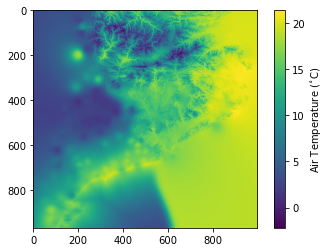

In [6]:
import matplotlib.pyplot as plt
plt.imshow(cluster_2_4_int.result)
cbar = plt.colorbar()
cbar.set_label('Air Temperature ($^{\circ}$C)')
plt.show()

Or we can just save the result into a .tif file using `save_file` function of PyMica class.

In [5]:
cluster_2_4_int.save_file('../sample-data/results/clusters_2_4_int.tif')